# **Importing Necessary Libraries**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab.patches import cv2_imshow

# **Reading and Displaying Images**

## *Human*

In [2]:
human=cv2.imread('/content/mypicture.jpg')
human=cv2.resize(human, (800,1200))
#cv2_imshow(human)

## *Robot*

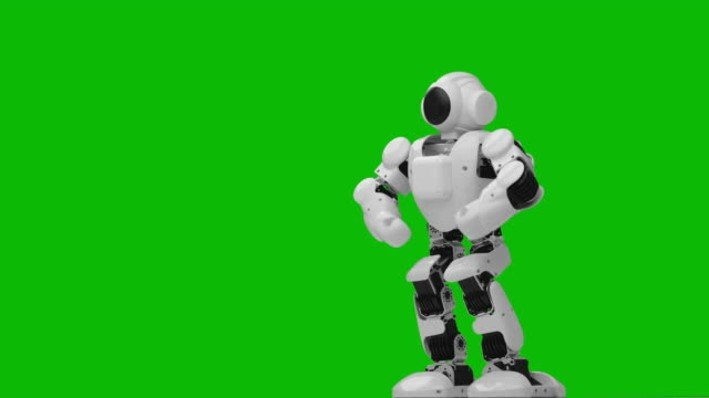

In [3]:
robot=cv2.imread('/content/robot.jpg')
cv2_imshow(robot)

# **Grayscale**

## *Human*

In [4]:
human_gray=cv2.cvtColor(human, cv2.COLOR_BGR2GRAY)
#cv2_imshow(human_gray)

## *Robot*

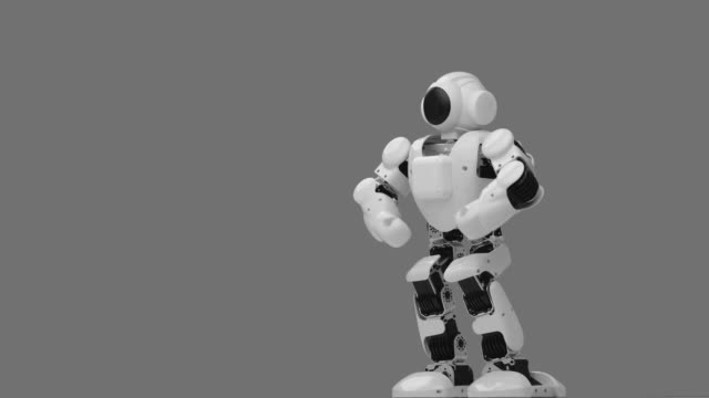

In [5]:
robot_gray=cv2.cvtColor(robot, cv2.COLOR_BGR2GRAY)
cv2_imshow(robot_gray)

# **Histograms**

## *BGR*

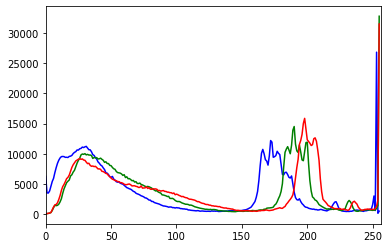

In [6]:
#Colored
color = ('b','g','r')
for i,col in enumerate(color):
  histr = cv2.calcHist([human],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

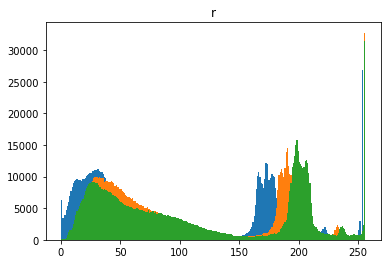

In [7]:
#Colored
for i,col in enumerate(color):
  plt.hist(human[:,:,i].ravel(),256,[0,256]); 
  plt.title(col)
plt.show()

## *Grayscale*

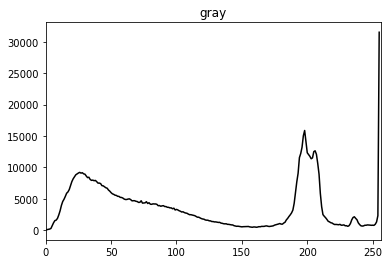

In [8]:
#Grayscale
hist_gray = cv2.calcHist([human_gray],[0],None,[256],[0,256])
plt.plot(histr,color = 'k')
plt.xlim([0,256])
plt.title('gray')
plt.show()

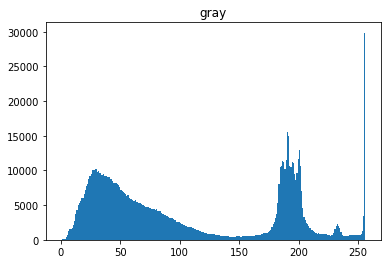

In [9]:
#GrayScale
plt.hist(human_gray.ravel(),256,[0,256]);
plt.title('gray') 
plt.show()

# **Histogram Equalization**

## *BGR*

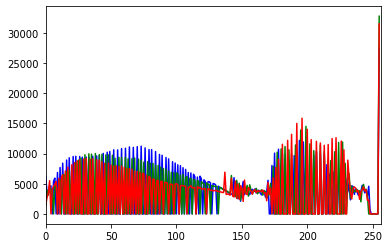

In [10]:
#Colored
human_hist_norm=np.zeros_like(human)
for i,col in enumerate(color):
  human_hist_norm[:,:,i]=cv2.equalizeHist(human[:,:,i])
  histr = cv2.calcHist([human_hist_norm],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.show()

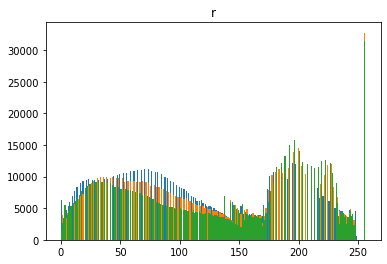

In [11]:
#Colored
for i,col in enumerate(color):
  plt.hist(human_hist_norm[:,:,i].ravel(),256,[0,256]); 
  plt.title(col)
plt.show()

In [12]:
#Colored Image Obtained after normalization
#cv2_imshow(human_hist_norm)

## *Grayscale*

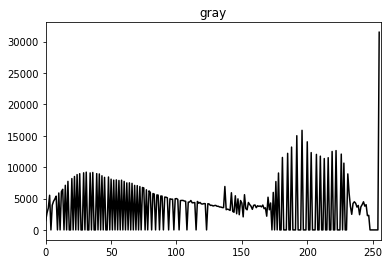

In [13]:
#GrayScale
human_gray_hist_norm=cv2.equalizeHist(human_gray)
hist_gray = cv2.calcHist([human_gray_hist_norm],[0],None,[256],[0,256])
plt.plot(histr,color = 'k')
plt.xlim([0,256])
plt.title('gray')
plt.show()

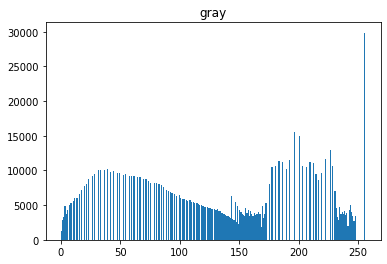

In [14]:
#GrayScale
plt.hist(human_gray_hist_norm.ravel(),256,[0,256]);
plt.title('gray') 
plt.show()

In [15]:
#Gray Scale Image Obtained after normalization
#cv2_imshow(human_gray_hist_norm)

# **Brightness**

## *BGR*

In [16]:
#Colored
human_bright = human + np.array([0.3*255, 0.5*255, 0.2*255]).reshape(1,1,3)
#cv2_imshow(human_bright)

## *Grayscale*

In [17]:
#GrayScale
human_gray_bright = human_gray + 0.4*255
#cv2_imshow(human_gray_bright)

# **Contrast**

## *BGR*

In [18]:
#Colored
human_con = human * np.array([2.1, 1.8, 1.2]).reshape(1,1,3)
#cv2_imshow(human_con)

## *Grayscale*

In [19]:
#GrayScale
human_gray_con = human_gray *1.5
#cv2_imshow(human_gray_con)

# **Gamma Correction**

## *BGR*

In [20]:
#Colored
human_gamma = np.power(human/255, (1/2.4))*255
#cv2_imshow(human_gamma)

## *Grayscale*

In [21]:
#GrayScale
human_gray_gamma = np.power(human_gray/255, (1/2.2))*255
#cv2_imshow(human_gray_gamma)

# **Negative**

## *BGR*

In [22]:
#Colored
human_neg = 1 - human
#cv2_imshow(human_neg)

## *Grayscale*

In [23]:
#GrayScale
human_gray_neg = 1 - human_gray
#cv2_imshow(human_gray_neg)

# **Diadic Image Processing**

## *Translate Robot*

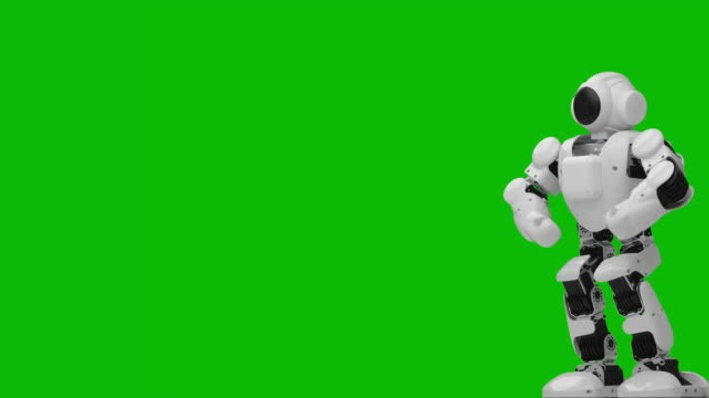

In [24]:
#Translation of Robot
height, width=robot.shape[:2]
b,g,r=robot[0,0,:]
T=np.float32([[1, 0, 150], [0, 1, 0]])
trans_robot=cv2.warpAffine(robot, T, (width, height), borderValue=(b.item(), g.item(), r.item()))

cv2_imshow(trans_robot)

## *Projective Tansformation*

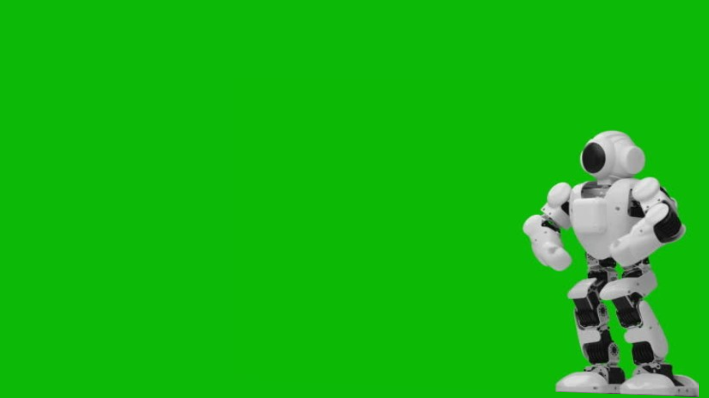

In [25]:
#Projective Transforamtion
T=np.float32([[1, 0, 150], [0, 1, 90],[-0.0001, 0, 1.3]])
presp_robot=cv2.warpPerspective(trans_robot, T, (width, height), borderValue=(int(b),int(g),int(r)))

cv2_imshow(presp_robot)


## *Resizing*

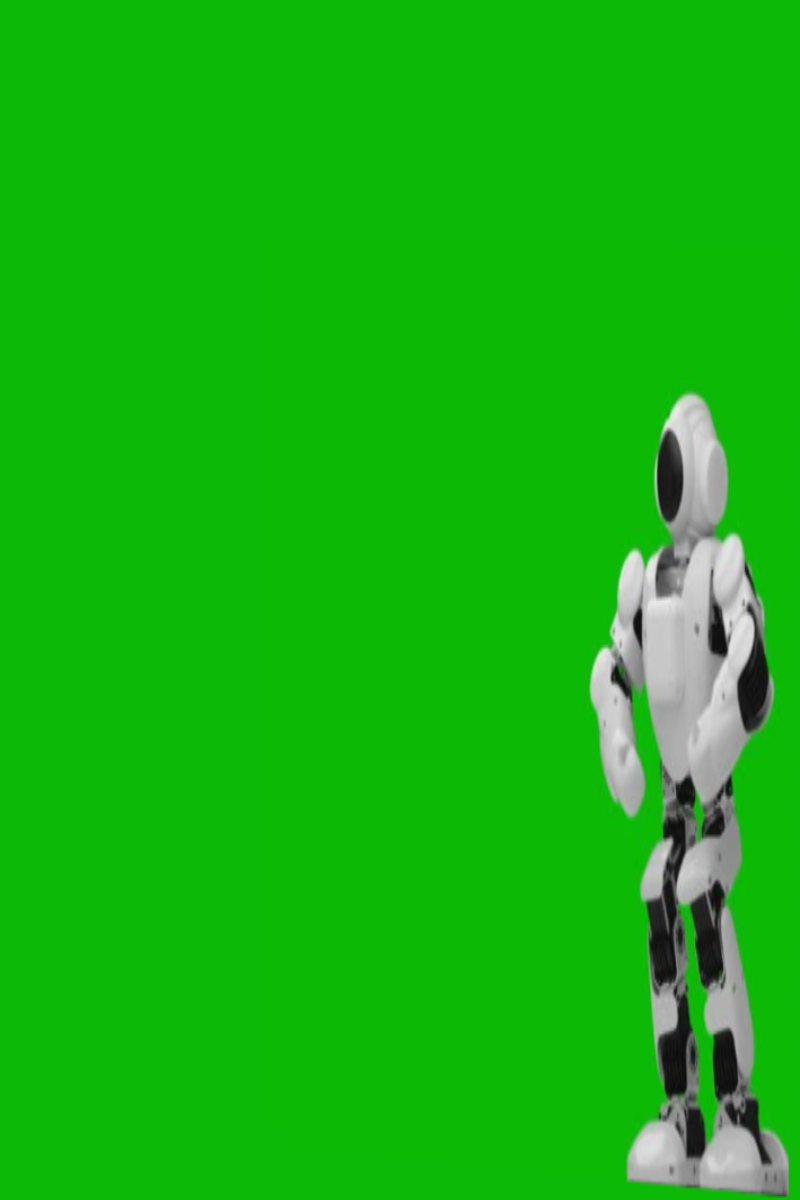

In [26]:
#Resize the image
proccessed_robot=cv2.resize(presp_robot, (800,1200))

cv2_imshow(proccessed_robot)

## *Mask Creation*

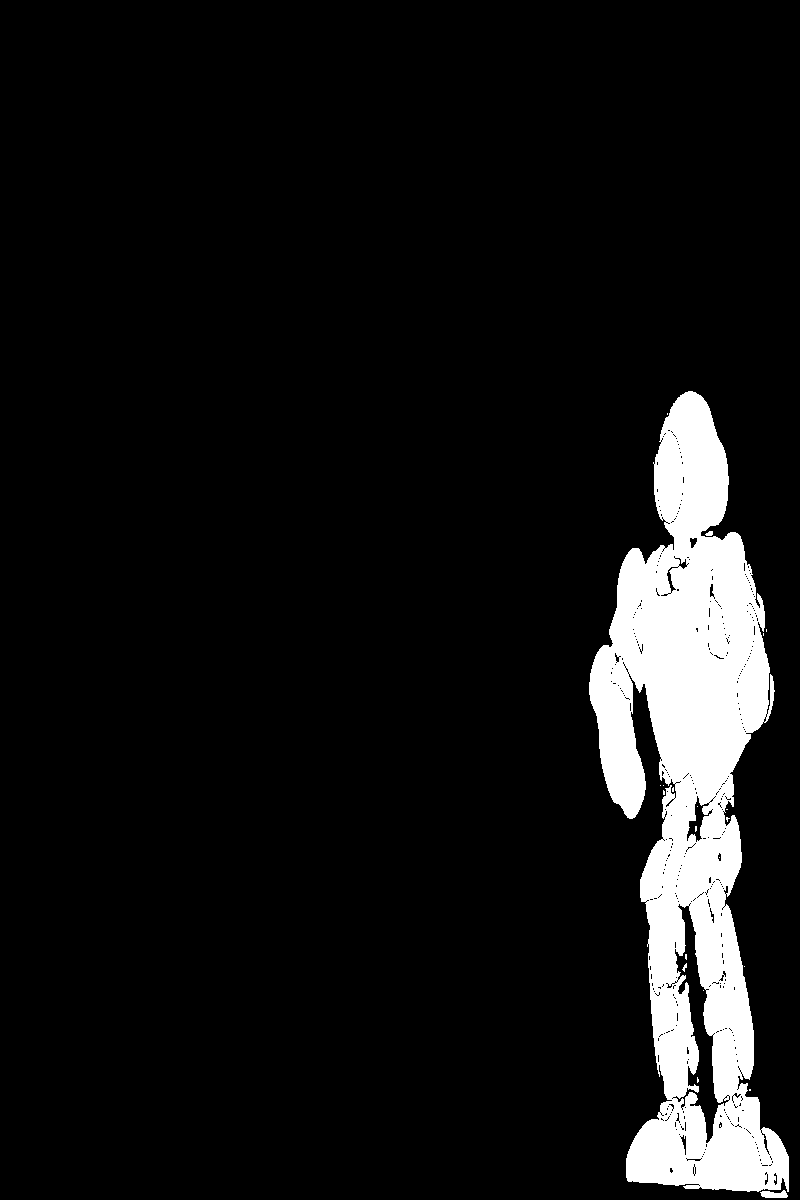

In [27]:
#Mask Creation
robot_gray=cv2.cvtColor(proccessed_robot, cv2.COLOR_BGR2GRAY)
height, width=robot_gray.shape
mask=robot_gray

for k in range(1200):
  for l in range(800):
    value = robot_gray.item(k,l)
    #'mask' contains only zero and one. This is done for its easier multiplication with robot image
    if value >= 109 and value <= 125:
      mask[k,l]=0
    else:
      mask[k,l]=1

cv2_imshow(mask*255) #upscaling for visualization


## *Robot with no background*

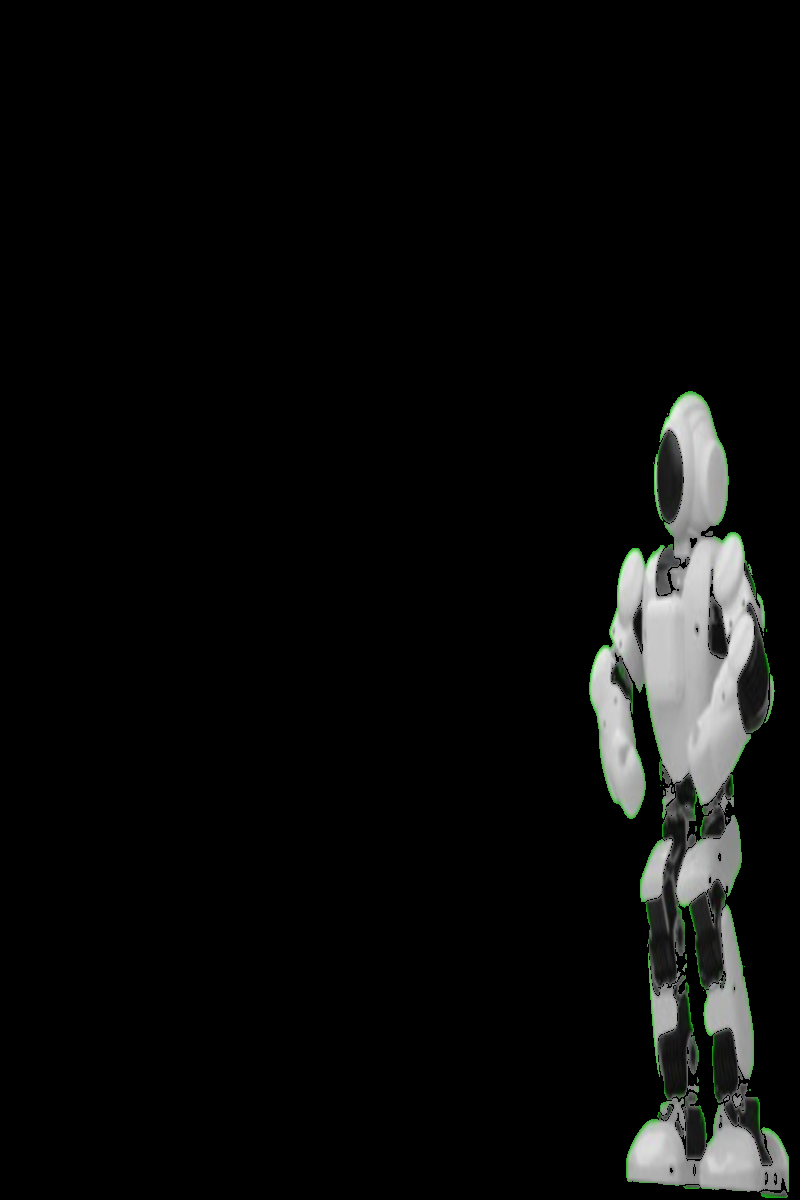

In [28]:
#Robot with Black Background
mask_merged=cv2.merge((mask,mask,mask))
robotBlackbg=np.multiply(proccessed_robot, mask_merged)

cv2_imshow(robotBlackbg)

## *Mask for Human*

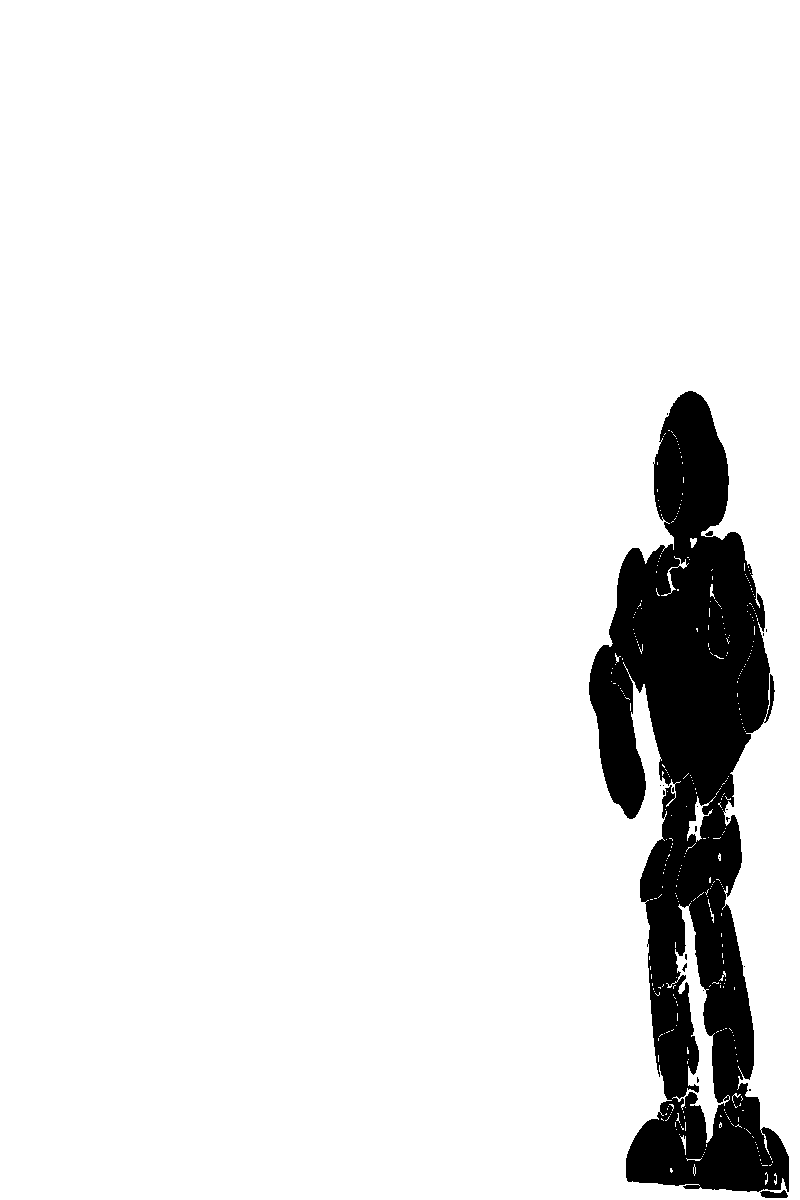

In [29]:
#Negative of Mask
negMask=1-mask_merged
cv2_imshow(negMask*255) #upscaling for visualization

## *Mask with Human*

In [30]:
#Mask imprinting on picture
imgwithMask=human*negMask
#cv2_imshow(imgwithMask)

## *Final Output*

In [31]:
#Final Image
final = imgwithMask + robotBlackbg

#cv2_imshow(final)